## JSON
JSON supports primitive types (strings, numbers, boolean), as well as nested arrays and objects. Simple Python objects are translated to JSON according to the following conversion:

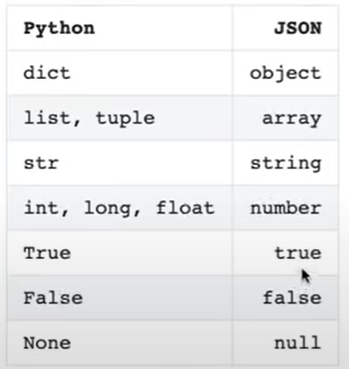

JSON format

In [1]:
{
    "firstName": "Jane",
    "lastName": "Doe",
    "hobbies": ["running", "swimming", "singing"],
    "age": 28,
    "children": [
        {
            "firstName": "Alex",
            "age": 5
        },
        {
            "firstName": "Bob",
            "age": 7
        }
    ]
}

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'swimming', 'singing'],
 'age': 28,
 'children': [{'firstName': 'Alex', 'age': 5}, {'firstName': 'Bob', 'age': 7}]}

### From Python to JSON (Serialization, Encode

In [2]:
import json

person = {"name": "John", "age": 30, "city": "New York", "hasChildren": False, "titles": ["engineer", "programmer"]}

# convert into JSON:
person_json = json.dumps(person)
# use different formatting style
person_json2 = json.dumps(person, indent=4, separators=("; ", "= "), sort_keys=True)

# the result is a JSON string:
print(person_json) 
print(person_json2) 

{"name": "John", "age": 30, "city": "New York", "hasChildren": false, "titles": ["engineer", "programmer"]}
{
    "age"= 30; 
    "city"= "New York"; 
    "hasChildren"= false; 
    "name"= "John"; 
    "titles"= [
        "engineer"; 
        "programmer"
    ]
}


In [5]:
import json

person = {"name": "John", "age": 30, "city": "New York", "hasChildren": False, "titles": ["engineer", "programmer"]}

with open('person.json', 'w') as f:
    json.dump(person,indent=4,fp=  f) # you can also specify indent etc...

## FROM JSON to Python (Deserialization, Decode)

In [6]:
import json
person_json = """
{
    "age": 30, 
    "city": "New York",
    "hasChildren": false, 
    "name": "John",
    "titles": [
        "engineer",
        "programmer"
    ]
}
"""
person = json.loads(person_json)
print(person)

{'age': 30, 'city': 'New York', 'hasChildren': False, 'name': 'John', 'titles': ['engineer', 'programmer']}


In [7]:
import json

with open('person.json', 'r') as f:
    person = json.load(f)
    print(person)

{'name': 'John', 'age': 30, 'city': 'New York', 'hasChildren': False, 'titles': ['engineer', 'programmer']}


### Working with Custom Objects
## Encoding

In [14]:
class User:
    # Custom class with all instance variables given in the __init__()
    def __init__(self, name, age,):
        self.name = name
        self.age = age




user =User("John", 30)

user_JSON = json.dumps(user)

TypeError: Object of type User is not JSON serializable

In [16]:
user_JSON = json.dumps(user.__dict__)
user_JSON

'{"name": "John", "age": 30}'

Second approch

In [19]:
class User:
    # Custom class with all instance variables given in the __init__()
    def __init__(self, name, age,):
        self.name = name
        self.age = age


def encode_user(o):
    if isinstance(o, User):
        return {'name': o.name, 'age': o.age, o.__class__.__name__: True}
    else:
        raise TypeError('Object of type User is not JSON serializable')

user =User("John", 30)

user_JSON = json.dumps(user,default=encode_user)

user_JSON

'{"name": "John", "age": 30, "User": true}'

third approch

In [22]:
from json import JSONEncoder

class User:
    # Custom class with all instance variables given in the __init__()
    def __init__(self, name, age,):
        self.name = name
        self.age = age


class UserEncoder(JSONEncoder):  
    def default(self, o):       # we will overwrite the default method
        if isinstance(o, User):
            return {'name': o.name, 'age': o.age, o.__class__.__name__: True}
        else:
            raise TypeError('Object of type User is not JSON serializable')



user =User("John", 30)

user_JSON = json.dumps(user,cls=UserEncoder)

user_JSON

'{"name": "John", "age": 30, "User": true}'

## Decode the object 

In [23]:
user_JSON

user = json.loads(user_JSON)

user.age

AttributeError: 'dict' object has no attribute 'age'

In [25]:
def decode_user(dct):
    if User.__name__ in dct:
        return User(name=dct['name'], age=dct['age'])
    return dct

user_JSON

user = json.loads(user_JSON, object_hook=decode_user)

user.age ,user.name


(30, 'John')